### Cansu Freeman HW #4
Problem 2.3 (a)

In [1]:
def bondPV(years, ytm, r, F):
    '''
    This function inputs a bond's number of years to maturity, 
    the yield-to-maturity, and coupon rate, and the bond's face value, 
    and returns the bond's present value.
    
    Input Variables: 
    years: years to maturity
    aytm:  annual yield to maturity
    r:     annual coupon rate
    F:     face value aka principal
    
    Other Variables:
    dr: discount rate
    CP: coupon payment  
    N:  no. of 6 month periods to maturity   
    '''
    
    dr = .5*ytm
    CP = (r*F)/2
    N = years*2  
    
    annCoupPV = 0
    for t in range(1, N+1):
        annCoupPV = annCoupPV + CP/((1+dr)**t)
    
    principalPV = F/(1+dr)**N
    
    PV = annCoupPV + principalPV
    
    return PV

 Testing function below:

In [2]:
bondPV(12, ytm = .05, r = .10, F = 1000)

1447.1246458144908

In [3]:
bondPV(12, ytm = .05, r = .05, F = 1000)

1000.0000000000016

2.3 (b)

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

In [5]:
ytm = np.arange(0.01, .10, 0.01)

bondA = []
bondB = []
for i in ytm:
    bondA.append(bondPV(10, ytm = i, r = .05, F = 1000))
    bondB.append(bondPV(30, ytm = i, r = .05, F = 1000))

In [6]:
df = pd.DataFrame({"ytm":ytm, "bondA":bondA, "bondB":bondB})
df

,ytm,bondA,bondB
0,0.01,1379.748383,2034.511215
1,0.02,1270.683294,1674.325576
2,0.03,1171.686388,1393.802689
3,0.04,1081.757167,1173.804433
4,0.05,1000.000000,1000.000000
5,0.06,925.612626,861.622182
6,0.07,857.875967,750.552659
7,0.08,796.145105,660.647650
8,0.09,739.841271,587.239559


<AxesSubplot:xlabel='ytm'>

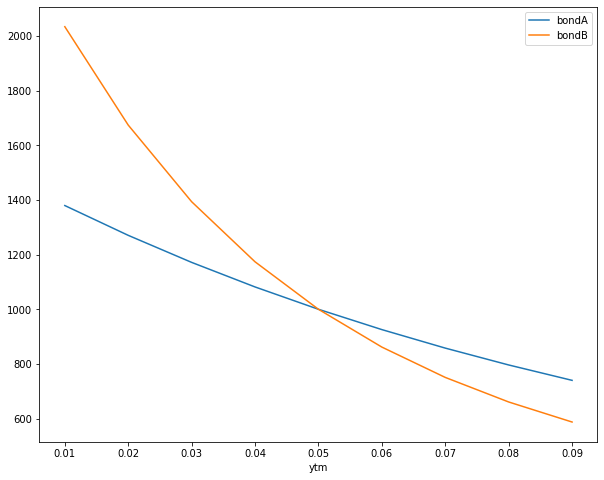

In [7]:
df.plot(x="ytm", y=["bondA", "bondB"], kind="line", figsize=(10, 8))

Here we can see that in both bonds as the yeild goes up, the prices decrease. This graph shows the negative relationship between the yeilds and prices. If looks like bondB, the 30 year bond, decreases at a faster rate than bondA, the 10 year bond. It doesn't look totally linear. It looks concave up and decreasing. 

2.3 (c)

In [8]:
deltaY = .01
df['drdyA'] = ""
df['drdyB'] = ""

for i in range(0, 9):
    df['drdyA'][i] = (deltaY/bondA[i])/deltaY
    df['drdyB'][i] = (deltaY/bondB[i])/deltaY

In [9]:
df

,ytm,bondA,bondB,drdyA,drdyB
0,0.01,1379.748383,2034.511215,0.00072477,0.000491519
1,0.02,1270.683294,1674.325576,0.000786978,0.000597255
2,0.03,1171.686388,1393.802689,0.000853471,0.000717462
3,0.04,1081.757167,1173.804433,0.000924422,0.000851931
4,0.05,1000.000000,1000.000000,0.001,0.001
5,0.06,925.612626,861.622182,0.00108037,0.0011606
6,0.07,857.875967,750.552659,0.00116567,0.00133235
7,0.08,796.145105,660.647650,0.00125605,0.00151367
8,0.09,739.841271,587.239559,0.00135164,0.00170288


<AxesSubplot:xlabel='ytm'>

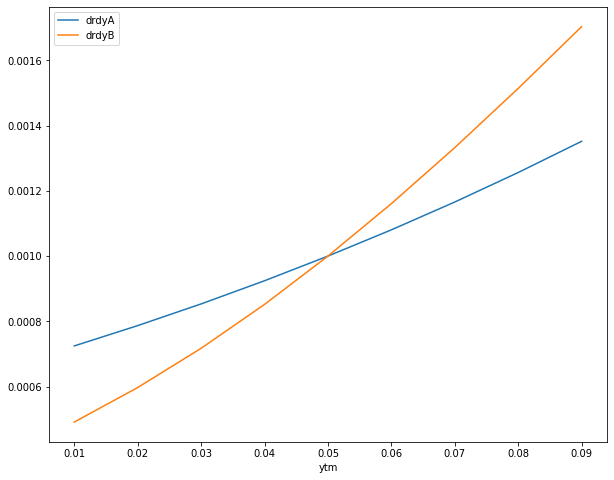

In [10]:
df.plot(x="ytm", y=["drdyA", "drdyB"], kind="line", figsize=(10, 8))

Again, here it looks like bond B, the 30 year bond, is increasing at a faster rate, implying that it is more sensitive. Thus, I assume from this example that the longer the bond takes to mature, the more sensitive it is to changes in yeilds. 